based on this site: http://matthewearl.github.io/2015/07/28/switching-eds-with-python/

DCLIB dounload link: https://sourceforge.net/projects/dclib/

DLIB download link (68 dots): http://sourceforge.net/projects/dclib/files/dlib/v18.10/shape_predictor_68_face_landmarks.dat.bz2

In [1]:
import dlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [264]:
PREDICTOR_PATH = "./shape_predictor_68_face_landmarks.dat" # downloaded and unzipped file
COLOUR_CORRECT_BLUR_FRAC = 0.6
FEATHER_AMOUNT = 5

In [265]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(PREDICTOR_PATH)

In [266]:
def get_landmarks(img): # landmarks are main 68 dots
    rects = detector(img , 1)
    
    if len(rects)> 1 :
        raise TooManyFaces
    if len(rects)== 0 :
        raise NoFaceDetected
    
    matrix = np.matrix([[p.x , p.y] for p in predictor(img , rects[0]).parts()])
    return matrix

### for test

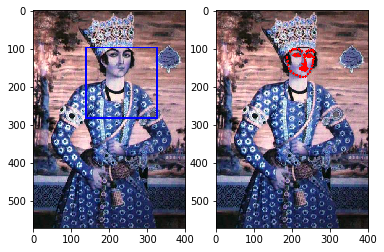

In [267]:
img = cv2.imread('img2_2.jpg')
rects = detector(img , 1)
result = cv2.rectangle(img.copy(),(139, 98),(324, 284),(0,0,255),3)
matrix = np.matrix([[p.x , p.y] for p in predictor(img , rects[0]).parts()])
array_temp = [[p.x , p.y] for p in predictor(img , rects[0]).parts()]
points_on_image = img.copy()
for x,y in enumerate(array_temp):
    cv2.circle(points_on_image,(y[0],y[1]),2,(255,0,0),2,-1)
plt.subplot(1,2,1)
plt.imshow(result)
plt.subplot(1,2,2)
plt.imshow(points_on_image)

In [1]:
def transformation_from_points(points1,points2): # points from both images
    points1 = points1.astype(np.float64)
    points2 = points2.astype(np.float64)
    
    c1 = np.mean(points1 , axis=0)
    c2 = np.mean(points2 , axis=0)
    
    points1 -= c1
    points2 -= c2
    
    s1 = numpy.std(points1)
    s2 = numpy.std(points2)
    points1 /= s1
    points2 /= s2
    
    U, S, Vt = np.linalg.svd(points1.T * points2)
    R = (U * Vt).T
    
    result= np.vstack([np.hstack(((s2 / s1) * R,
                                       c2.T - (s2 / s1) * R * c1.T)),
                         np.matrix([0., 0., 1.])])
    return result

### for test

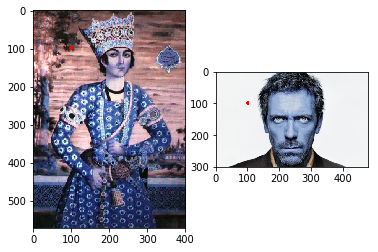

In [269]:
img1 = cv2.imread('img2_2.jpg')
img2 = cv2.imread('house.jpg')
points1 = np.asarray(get_landmarks(img1)).astype(np.float64)
points2 = np.asarray(get_landmarks(img2)).astype(np.float64)

c1 = np.mean(points1, axis=0)
c2 = np.mean(points2, axis=0)
points1 -= c1
points2 -= c2

s1 = np.std(points1)
s2 = np.std(points2)
points1 /= s1
points2 /= s2

a = points1+100
for x,y in enumerate(a):
    cv2.circle(img1,(int(y[0]),int(y[1])),2,(255,0,0),2,-1)
    
b = points2+100
for x,y in enumerate(b):
    cv2.circle(img2,(int(y[0]),int(y[1])),2,(255,0,0),2,-1)
    
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)


In [270]:
def warp_im(im, M, dshape):
    output_im = np.zeros(dshape, dtype=im.dtype)
    cv2.warpAffine(im,
                   M[:2],
                   (dshape[1], dshape[0]),
                   dst=output_im,
                   borderMode=cv2.BORDER_TRANSPARENT,
                   flags=cv2.WARP_INVERSE_MAP)
    return output_im

In [271]:
# COLOUR_CORRECT_BLUR_FRAC = 0.6
LEFT_EYE_POINTS = list(range(42, 48))
RIGHT_EYE_POINTS = list(range(36, 42))


def correct_colours(im1, im2, landmarks1):
    blur_amount = COLOUR_CORRECT_BLUR_FRAC * np.linalg.norm(
                              np.mean(landmarks1[LEFT_EYE_POINTS], axis=0) -
                              np.mean(landmarks1[RIGHT_EYE_POINTS], axis=0))
    blur_amount = int(blur_amount)
    if blur_amount % 2 == 0:
        blur_amount += 1
    im1_blur = cv2.GaussianBlur(im1, (blur_amount, blur_amount), 0)
    im2_blur = cv2.GaussianBlur(im2, (blur_amount, blur_amount), 0)

    # Avoid divide-by-zero errors.
    im2_blur += (128 * (im2_blur <= 1.0)).astype(np.uint8)

    return (im2.astype(np.float64) * im1_blur.astype(np.float64) /
                                                im2_blur.astype(np.float64))


### for test

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


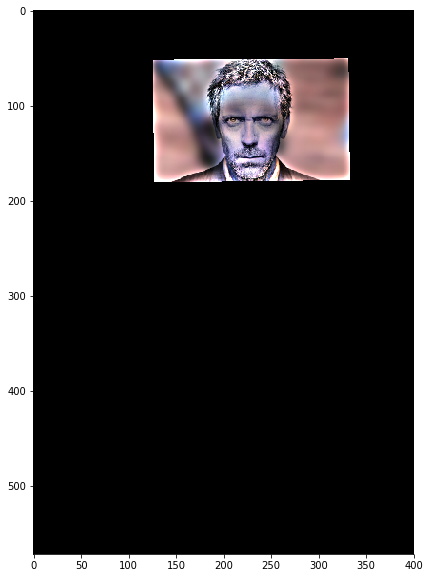

In [272]:
im1 = img1.copy()
im2 = warpped_img2.copy()
landmarks1 = landmark1
blur_amount = 0.9 * np.linalg.norm(
                          np.mean(landmarks1[LEFT_EYE_POINTS], axis=0) -
                          np.mean(landmarks1[RIGHT_EYE_POINTS], axis=0))
blur_amount = int(blur_amount)
if blur_amount % 2 == 0:
    blur_amount += 1
im1_blur = cv2.GaussianBlur(im1, (blur_amount, blur_amount), 0)
im2_blur = cv2.GaussianBlur(im2, (blur_amount, blur_amount), 0)

# Avoid divide-by-zero errors.
im2_blur += (128 * (im2_blur <= 1.0)).astype(np.uint8)

res = (im2.astype(np.float64) * im1_blur.astype(np.float64) /
                                            im2_blur.astype(np.float64))
plt.figure(figsize=(10,10))
plt.imshow(res/255)

In [273]:
LEFT_EYE_POINTS = list(range(42, 48))
RIGHT_EYE_POINTS = list(range(36, 42))
LEFT_BROW_POINTS = list(range(22, 27))
RIGHT_BROW_POINTS = list(range(17, 22))
NOSE_POINTS = list(range(27, 35))
MOUTH_POINTS = list(range(48, 61))
OVERLAY_POINTS = [
    LEFT_EYE_POINTS + RIGHT_EYE_POINTS + LEFT_BROW_POINTS + RIGHT_BROW_POINTS,
    NOSE_POINTS + MOUTH_POINTS,
]
# FEATHER_AMOUNT = 11

def draw_convex_hull(im, points, color):
    points = cv2.convexHull(points)
    cv2.fillConvexPoly(im, points, color=color)
    
def get_face_mask(im, landmarks):
    im = np.zeros(im.shape[:2], dtype=np.float64)

    for group in OVERLAY_POINTS:
        draw_convex_hull(im,
                         landmarks[group],
                         color=1)

    im = np.array([im, im, im]).transpose((1, 2, 0))

    im = (cv2.GaussianBlur(im, (FEATHER_AMOUNT, FEATHER_AMOUNT), 0) > 0) * 1.0
    im = cv2.GaussianBlur(im, (FEATHER_AMOUNT, FEATHER_AMOUNT), 0)

    return im


In [274]:
img1 = cv2.imread('img2_2.jpg')
landmark1 = get_landmarks(img1)

img2 = cv2.imread('house.jpg')
landmark2 = get_landmarks(img2)

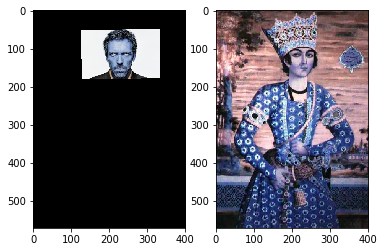

In [275]:
M = transformation_from_points(landmark1,landmark2)
warpped_img2 = warp_im(img2,M,img1.shape)
plt.subplot(1,2,1)
plt.imshow(warpped_img2)
plt.subplot(1,2,2)
plt.imshow(img1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


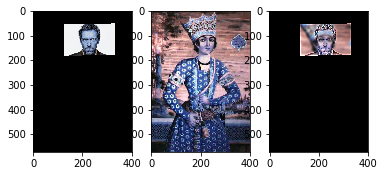

In [276]:
corrected_color = correct_colours(img1,warpped_img2,landmark1)
plt.subplot(1,3,1)
plt.imshow(warpped_img2)
plt.subplot(1,3,2)
plt.imshow(img1/255.)
plt.subplot(1,3,3)
plt.imshow(corrected_color/255.)

Text(0.5, 1.0, 'combined mask')

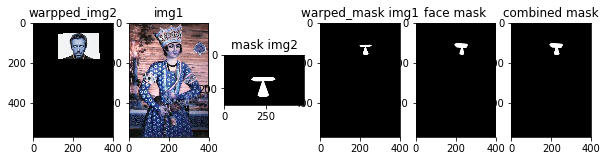

In [277]:
mask = get_face_mask(img2, landmark2)
warped_mask = warp_im(mask, M, img1.shape)
face_mask = get_face_mask(img1, landmark1)
combined_mask = np.max([face_mask, warped_mask],axis=0)

plt.figure(figsize=(10,10))
plt.subplot(1,6,1)
plt.imshow(warpped_img2)
plt.title('warpped_img2')
plt.subplot(1,6,2)
plt.imshow(img1/255.)
plt.title('img1')
plt.subplot(1,6,3)
plt.imshow(mask)
plt.title('mask img2')
plt.subplot(1,6,4)
plt.imshow(warped_mask)
plt.title('warped_mask img1')
plt.subplot(1,6,5)
plt.imshow(face_mask)
plt.title('face mask')
plt.subplot(1,6,6)
plt.imshow(combined_mask)
plt.title('combined mask')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

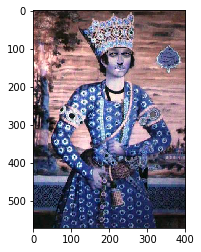

In [278]:
output_im = img1 * (1.0 - combined_mask)+ corrected_color * combined_mask
plt.imshow(output_im/255)
cv2.imwrite('result.jpg',output_im)